In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mnist Data

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist.data, mnist.target


In [5]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


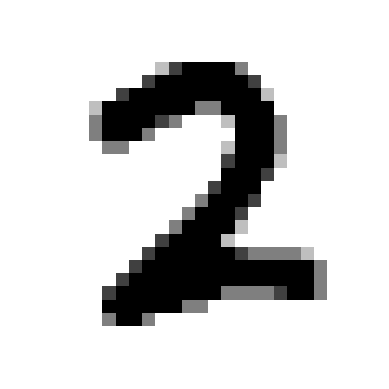

In [16]:
import matplotlib.pylab as plt

X = np.array(X)
some_digit = X[69995]

image = some_digit.reshape(28, 28)
plt.imshow(image, cmap="binary")
plt.axis("off")
plt.show()

In [8]:
len(some_digit)

784

In [14]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Logistic Regression

In [19]:
y_train_5 = (y_train == '5')
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=2024)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=2024)

In [23]:
sgd_clf.predict([X[0]])

array([ True])

In [24]:
sgd_clf.predict([X[1]])

array([False])

# Performances Measures

In [25]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.9625 , 0.96185, 0.96125])

In [26]:
np.mean(y_train_5 == False)

0.90965

## Confusion Matrix

In [27]:
from sklearn.model_selection import cross_val_predict

y_train_5_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [28]:
y_train_5_pred

array([False, False, False, ...,  True, False, False])

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_5_pred)
cm

array([[53863,   716],
       [ 1572,  3849]])

In [31]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train_5, y_train_5_pred)
recall = recall_score(y_train_5, y_train_5_pred)

precision, recall

(0.8431544359255203, 0.710016602102933)

In [32]:
# precision
cm[1,1]/(cm[1,1]+cm[0,1])

0.8431544359255203

In [33]:
# recall
cm[1,1]/(cm[1,0]+cm[1,1])

0.710016602102933

## Precision/Recall trade-off

In [34]:
y_score = sgd_clf.decision_function([X[0]])
y_score

array([7358.64569104])

In [37]:
y_score = sgd_clf.decision_function([X[0]])
y_score

array([7358.64569104])

In [38]:
threshold = 0
y_pred = (y_score>threshold)
y_pred

array([ True])

In [39]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                                   method='decision_function')

In [49]:
threshold = -6000
y_train_pred_new = (y_scores>threshold)

cm = confusion_matrix(y_train_5, y_train_pred_new)
print(cm)

precision = precision_score(y_train_5, y_train_pred_new)
print(f"precision = {precision.round(3)}")

recall = recall_score(y_train_5, y_train_pred_new)
print(f"recall/TPR = {recall.round(3)}")

FPR = cm[0,1]/(cm[0,0] + cm[0,1])
print(f"FPR = {FPR.round(3)}")


[[49858  4721]
 [  496  4925]]
precision = 0.511
recall/TPR = 0.909
FPR = 0.086


## ROC curve

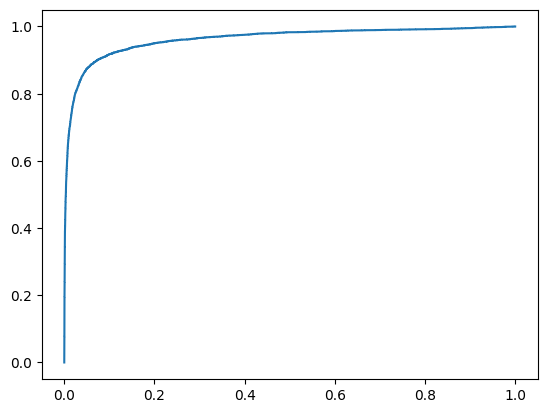

In [51]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

plt.plot(fpr, tpr)
plt.show()